This Project aims to classify forest cover types ranging from 1 to 7 in the data with features about geology and location. A few features were created to extract hidden information from the data. The modelling process consists of two models, ExtraTree and RandomForest Classifiers, which were combined to generate final predications.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

%matplotlib inline

train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [106]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

No missing values !!

In [108]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Visualizations

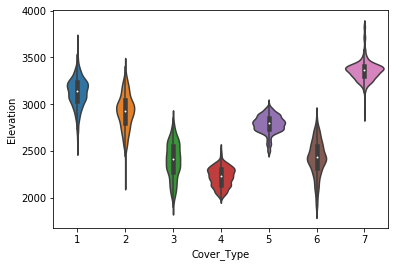

In [109]:
sns.violinplot(x = 'Cover_Type', y = 'Elevation', data = train)

#every cover type seems to have different range of elevation, which is a good feature

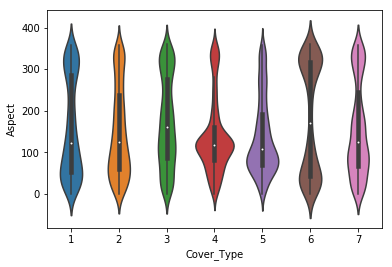

In [110]:
sns.violinplot(x = 'Cover_Type', y = 'Aspect', data = train)

#this feature is good for type 3 to 7, but 1 and 2 show really similar mean and std for this feature

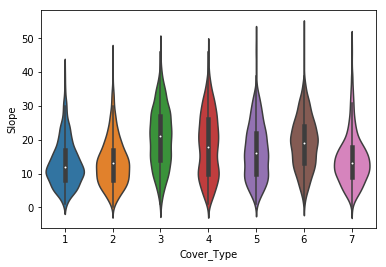

In [111]:
sns.violinplot(x = 'Cover_Type', y = 'Slope', data = train)

#slope is like aspect across different types 

Through violinplots above, it can be seen that Elevation is more important than the other two in seperating cover types. Different cover types behave similarly across different Aspect and Slope. 

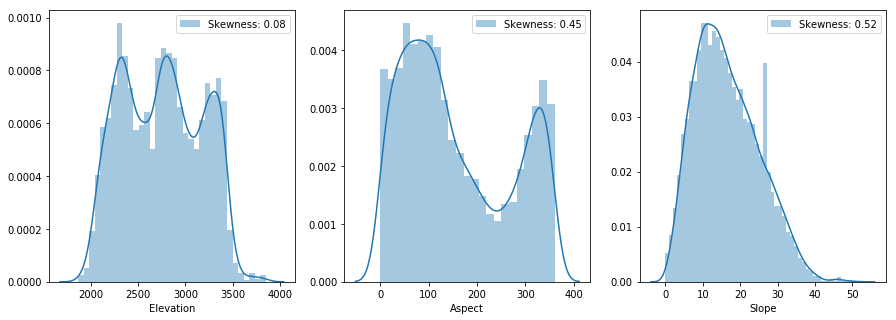

In [112]:
_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5)) 
sns.distplot(train['Elevation'], ax=ax1, label = "Skewness: {0:.2f}".format(train['Elevation'].skew())).legend()
sns.distplot(train['Aspect'], ax=ax2 ,label = "Skewness: {0:.2f}".format(train['Aspect'].skew())).legend()
sns.distplot(train['Slope'], ax=ax3, label = "Skewness: {0:.2f}".format(train['Slope'].skew())).legend()

no significant skewness is found among distributions of three features above. :)

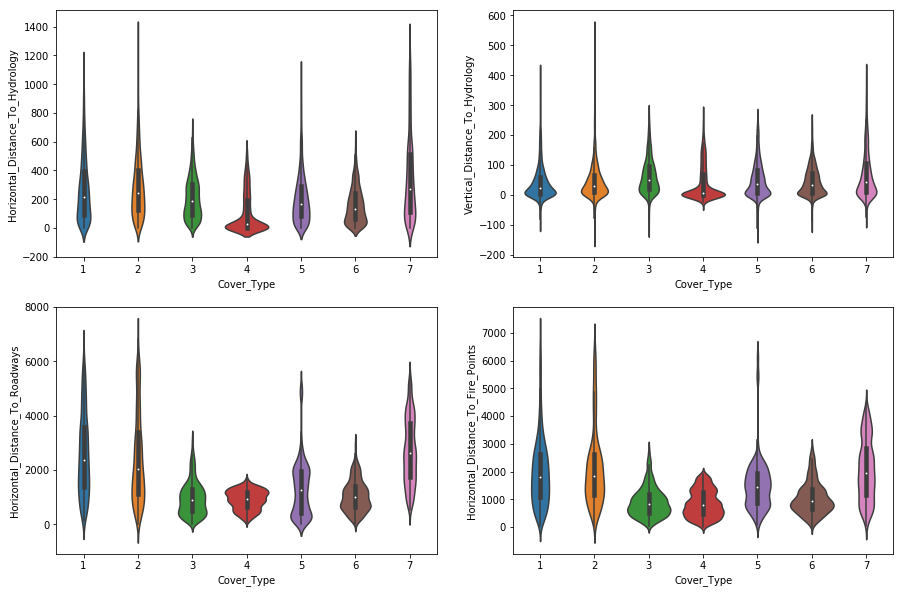

In [113]:
_, axarr = plt.subplots(2 ,2, figsize = (15,10))
sns.violinplot(x = 'Cover_Type', y = 'Horizontal_Distance_To_Hydrology', data = train, ax = axarr[0,0])
sns.violinplot(x = 'Cover_Type', y = 'Vertical_Distance_To_Hydrology', data = train, ax = axarr[0,1])
sns.violinplot(x = 'Cover_Type', y = 'Horizontal_Distance_To_Roadways', data = train, ax = axarr[1,0])
sns.violinplot(x = 'Cover_Type', y = 'Horizontal_Distance_To_Fire_Points', data = train, ax = axarr[1,1])

Distances are not strongly tied to cover types according to plots above

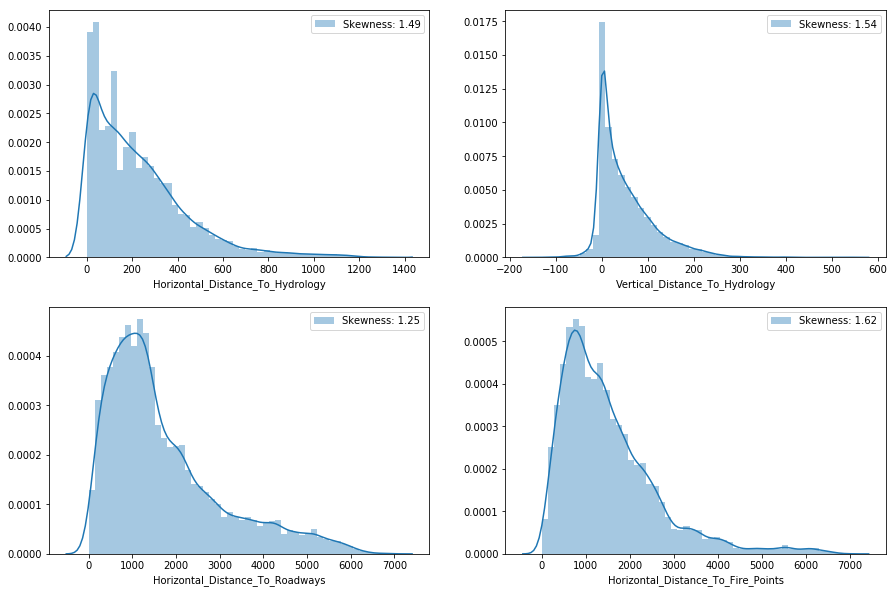

In [114]:
_, axarr = plt.subplots(2 ,2, figsize = (15,10))
sns.distplot(train['Horizontal_Distance_To_Hydrology'], ax = axarr[0,0], \
             label = "Skewness: {0:.2f}".format(train['Horizontal_Distance_To_Hydrology'].skew())).legend()
sns.distplot(train['Vertical_Distance_To_Hydrology'], ax = axarr[0,1], \
             label = "Skewness: {0:.2f}".format(train['Vertical_Distance_To_Hydrology'].skew())).legend()
sns.distplot(train['Horizontal_Distance_To_Roadways'], ax = axarr[1,0], \
             label = "Skewness: {0:.2f}".format(train['Horizontal_Distance_To_Roadways'].skew())).legend()
sns.distplot(train['Horizontal_Distance_To_Fire_Points'], ax = axarr[1,1], \
             label = "Skewness: {0:.2f}".format(train['Horizontal_Distance_To_Fire_Points'].skew())).legend()

These four give larger skewness values, but still acceptable

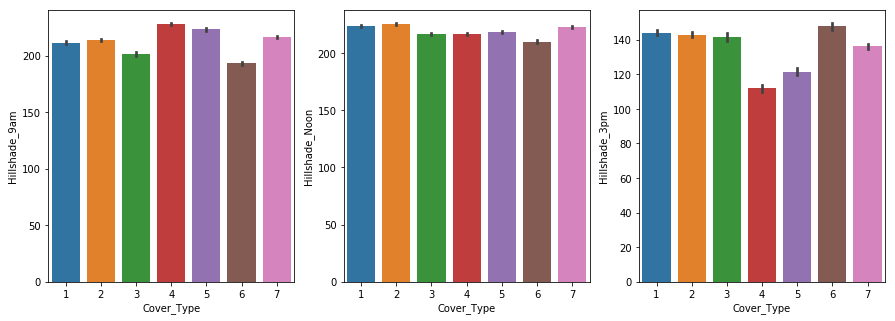

In [127]:
_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5)) 
sns.barplot(x = 'Cover_Type', y = 'Hillshade_9am', data = train, ax=ax1)
sns.barplot(x = 'Cover_Type', y = 'Hillshade_Noon', data = train, ax=ax2)
sns.barplot(x = 'Cover_Type', y = 'Hillshade_3pm', data = train, ax=ax3)

#hillshade is also good for types 3 to 7, but weak for type 1 and 2

Cover type is not really distinguishable at noon, and hillshade differences across cover types are large at 9am and 3pm

In [128]:
def transform_data(data):
    data['Euclidean_Distance_To_Hydrology'] = np.sqrt(data['Horizontal_Distance_To_Hydrology']**2 + \
                                                     data['Vertical_Distance_To_Hydrology']**2)
    distance_features = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',\
                    'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',\
                    ]
    #calcualte Euclidean distance with horizontal and vertical distances 
    
    def ratio_big_to_small(a, b): 
        #get ratio of larger of two to smaller of two
        if a < 1:
            a = 1
        if b < 1:
            b = 1
        a, b = np.abs(a), np.abs(b)
        if a >= b:
            return a/b
        else:
            return b/a
        
    for feature1 in distance_features:
        for feature2 in distance_features:
            if feature1 != feature2:
                new_feature1 = feature1 + '*' + feature2
                data[new_feature1] = data[feature1] * data[feature2]
                new_feature2 = feature1 + '+' + feature2
                data[new_feature2] = data[feature1] + data[feature2]
                new_feature3 = feature1 + '-' + feature2
                data[new_feature3] = np.abs(data[feature1] + data[feature2])
                new_feature4 = feature1 + '/' + feature2
                data[new_feature4] = data.apply(lambda row: ratio_big_to_small(row[feature1], row[feature2]), axis=1)
        new_feature5 = feature1 + '^2'
        data[new_feature5] = data[feature1]**2
    #generate new features with existing distance features for the purpose of helping prediction of type 1 and 2
    
    data['Hillshade_Range'] = data[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].apply(np.ptp, axis = 1)
    data['Hillshade_Std'] = data[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].apply(np.std, axis = 1)
    #find relationship between hillshade at different times
    
    return data

In [129]:
train = shuffle(train, random_state = 0)
new_train = transform_data(train)
X_train, y_train = new_train.drop(['Cover_Type'], axis = 1).values, new_train['Cover_Type'].values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
processed_test = scaler.transform(transform_data(test))

Do grid search on each base model ExtraTree and RandomForest

In [130]:

def base_grid_search(clf, param, X_train, y_train, metric='accuracy'):
    grid_search = GridSearchCV(clf, param_grid = param, cv = 5, scoring = metric, n_jobs = -1, verbose = 3)
    grid_search.fit(X_train, y_train)
    print (grid_search.best_score_, grid_search.best_params_)

def color_confu(y_true, y_predict):
    #define metric on which optimizations of feature engineerings and algorithms are based upon
    confu_mx = confusion_matrix(y_true, y_predict)
    print('Accuracy for each type: ', confu_mx.diagonal()/confu_mx.sum(axis=1))
    row_sums = confu_mx.sum(axis = 1, keepdims=True)
    norm_conf_mx = confu_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    sns.heatmap(norm_conf_mx, cmap=plt.cm.gray, linewidths=0.1, annot=True)

In [131]:
# a baseline model that got 69% in submisssion as a benchmark to gauge how well the voting classifier performs
extra = ExtraTreesClassifier(max_depth = 85, n_estimators = 65, max_features = 33)
extra.fit(X_train, y_train)
each_type, each_weight = np.unique(extra.predict(processed_test), return_counts=True)

In [132]:
extra_base = ExtraTreesClassifier(max_depth = 85, n_estimators = 65, max_features = 33)
extra_base_predict = cross_val_predict(extra_base, X_train, y_train, cv=5, n_jobs=-1)

Accuracy for each type:  [ 0.80231481  0.75925926  0.87361111  0.97268519  0.96574074  0.90648148
  0.97962963]


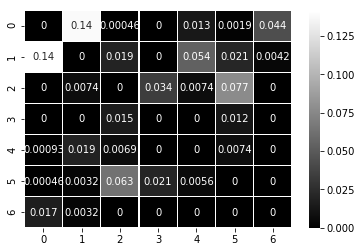

In [133]:
color_confu(y_train, extra_base_predict)
# this accuracy is ok, and misclassifications happen at 2<->5, 1<->4, and 1<->2

Accuracy for each type:  [ 0.7973038   0.79074658  0.86267107  0.93152512  0.89856957  0.85468538
  0.93841382]


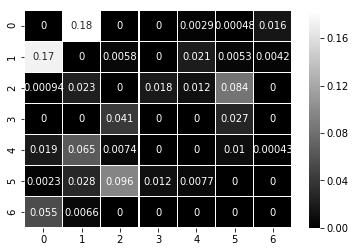

In [134]:
rf_base = RandomForestClassifier(n_estimators=100, max_depth = 70, max_features = 9)
rf_base_predict = cross_val_predict(rf_base, X_train, y_train, n_jobs = -1, cv=5)
color_confu(rf_base_predict, y_train)
#though its accuracy is a little lower than that of the previous model,
# it is less subject to erros when the actual class is 1 or 2, the diversity the voting classifier needs

In [135]:
#check feature importance with both classifiers
features = new_train.drop(['Cover_Type'], axis=1)
rf_base.fit(X_train, y_train)
extra_base.fit(X_train, y_train)
sorted(zip(rf_base.feature_importances_, list(features)), reverse=True)

[(0.12555487939779189, 'Elevation'),
 (0.035628167652129374, 'Id'),
 (0.027256265064191491, 'Wilderness_Area4'),
 (0.021703003992120894,
  'Horizontal_Distance_To_Fire_Points-Horizontal_Distance_To_Roadways'),
 (0.019455660187413543,
  'Horizontal_Distance_To_Fire_Points+Horizontal_Distance_To_Roadways'),
 (0.017643003925316193, 'Hillshade_9am'),
 (0.017298996564899857,
  'Horizontal_Distance_To_Roadways-Horizontal_Distance_To_Fire_Points'),
 (0.016593511622753469, 'Aspect'),
 (0.016441371116025543,
  'Horizontal_Distance_To_Roadways+Horizontal_Distance_To_Fire_Points'),
 (0.016318719997301927,
  'Horizontal_Distance_To_Roadways+Horizontal_Distance_To_Hydrology'),
 (0.015873312546636101, 'Hillshade_Std'),
 (0.014673487387582434, 'Hillshade_Noon'),
 (0.014372742665831058,
  'Horizontal_Distance_To_Roadways*Horizontal_Distance_To_Fire_Points'),
 (0.013838253231185742,
  'Vertical_Distance_To_Hydrology+Horizontal_Distance_To_Roadways'),
 (0.013683108715791143, 'Wilderness_Area1'),
 (0.013

In [136]:
sorted(zip(extra_base.feature_importances_, list(features)), reverse=True)

[(0.14556505408095327, 'Elevation'),
 (0.063450181621111684, 'Wilderness_Area4'),
 (0.026660849438438789, 'Soil_Type10'),
 (0.024081588882298891, 'Soil_Type3'),
 (0.023700396997123809, 'Soil_Type39'),
 (0.022330059999041404, 'Soil_Type38'),
 (0.020970015282697395, 'Wilderness_Area1'),
 (0.019282280907075292, 'Id'),
 (0.017192110897080722,
  'Horizontal_Distance_To_Roadways+Horizontal_Distance_To_Fire_Points'),
 (0.015648844539613252, 'Soil_Type4'),
 (0.01437703904778038, 'Aspect'),
 (0.01383250055459889,
  'Horizontal_Distance_To_Fire_Points-Horizontal_Distance_To_Roadways'),
 (0.013551383435966116, 'Hillshade_9am'),
 (0.013273968605452949, 'Wilderness_Area3'),
 (0.012397333677230202, 'Hillshade_Noon'),
 (0.012218488779622524,
  'Horizontal_Distance_To_Roadways-Horizontal_Distance_To_Fire_Points'),
 (0.012194374008236912,
  'Horizontal_Distance_To_Hydrology-Horizontal_Distance_To_Roadways'),
 (0.011920398323862278,
  'Vertical_Distance_To_Hydrology+Horizontal_Distance_To_Roadways'),
 (

In [137]:
#cut features that have importance values less than feature_threshold in both sets
rf_importance = dict(zip(list(features), rf_base.feature_importances_))
extra_importance = dict(zip(list(features), extra_base.feature_importances_))
trash_features = []
feature_threshold = 0.001
for feature in rf_importance:
    ind = list(new_train).index(feature)
    if rf_importance[feature] < feature_threshold and extra_importance[feature] < feature_threshold:
        trash_features.append(ind)
for feature in extra_importance:
    ind = list(new_train).index(feature)
    if rf_importance[feature] < feature_threshold and extra_importance[feature] < feature_threshold and ind not in trash_features:
        trash_features.append(ind)

In [138]:
X_train_new = np.delete(X_train, trash_features, axis = 1)
new_test = np.delete(processed_test, trash_features, axis = 1)

In [139]:
#take advantage of these two classifiers thorugh combining them with an optimized weights
vote_clf = VotingClassifier(estimators=[('extra', ExtraTreesClassifier(max_depth = 85, n_estimators = 65, max_features = 33,
                                                                     )),
                                        ('rf',RandomForestClassifier(n_estimators=100, max_depth = 70, max_features = 9,
                                                                    ))],
                            voting='soft', weights=[2.3,1])

vote_predict = cross_val_predict(vote_clf, X_train_new, y_train, cv=5, n_jobs=-1)

Accuracy for each type:  [ 0.80324074  0.75601852  0.87361111  0.97361111  0.96388889  0.90138889
  0.98148148]


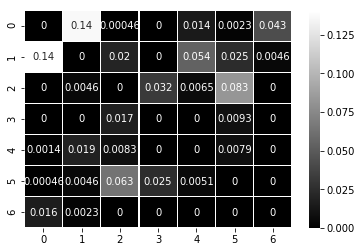

In [140]:
#this voting classifier achieved 80% on Kaggle, a big improvement over ExtraTree
#this improvement can be attributed to increase in precision of 1,2 classification
#the next step can be extracting more features to differentiate type 1 and type 2
color_confu(y_train, vote_predict)

In [141]:
#code to submit prediction on test data

# vote_clf.fit(X_train_new, y_train)
# sub = pd.DataFrame({'Id': test['Id'], \
#                    'Cover_Type': vote_clf.predict(new_test)})
# sub = sub[['Id', 'Cover_Type']]
# sub.to_csv('new_features_vote.csv', index=False)